# The Stock Market Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%precision 4
pd.set_option('precision', 4)

In [4]:
market = pd.read_csv('./data/Smarket.csv', )
market = market.rename(columns = {'Unnamed: 0': 'Day'})
market.head()

,Day,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,3,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,4,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,5,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [5]:
market.shape

(1250, 10)

In [6]:
market.describe()

,Day,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1250.0000,1250.000,1250.0000,1250.0000,1250.0000,1250.0000,1250.0000,1250.0000,1250.0000
mean,625.5000,2003.016,0.0038,0.0039,0.0017,0.0016,0.0056,1.4783,0.0031
std,360.9882,1.409,1.1363,1.1363,1.1387,1.1388,1.1476,0.3604,1.1363
min,1.0000,2001.000,-4.9220,-4.9220,-4.9220,-4.9220,-4.9220,0.3561,-4.9220
25%,313.2500,2002.000,-0.6395,-0.6395,-0.6400,-0.6400,-0.6400,1.2574,-0.6395
50%,625.5000,2003.000,0.0390,0.0390,0.0385,0.0385,0.0385,1.4230,0.0385
75%,937.7500,2004.000,0.5968,0.5968,0.5968,0.5968,0.5970,1.6417,0.5968
max,1250.0000,2005.000,5.7330,5.7330,5.7330,5.7330,5.7330,3.1525,5.7330


In [7]:
market.corr(method = 'pearson')

,Day,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Day,1.0000,0.9798,0.0354,0.0360,0.0390,0.0414,0.0350,0.5463,0.0353
Year,0.9798,1.0000,0.0297,0.0306,0.0332,0.0357,0.0298,0.5390,0.0301
Lag1,0.0354,0.0297,1.0000,-0.0263,-0.0108,-0.0030,-0.0057,0.0409,-0.0262
Lag2,0.0360,0.0306,-0.0263,1.0000,-0.0259,-0.0109,-0.0036,-0.0434,-0.0103
Lag3,0.0390,0.0332,-0.0108,-0.0259,1.0000,-0.0241,-0.0188,-0.0418,-0.0024
Lag4,0.0414,0.0357,-0.0030,-0.0109,-0.0241,1.0000,-0.0271,-0.0484,-0.0069
Lag5,0.0350,0.0298,-0.0057,-0.0036,-0.0188,-0.0271,1.0000,-0.0220,-0.0349
Volume,0.5463,0.5390,0.0409,-0.0434,-0.0418,-0.0484,-0.0220,1.0000,0.0146
Today,0.0353,0.0301,-0.0262,-0.0103,-0.0024,-0.0069,-0.0349,0.0146,1.0000


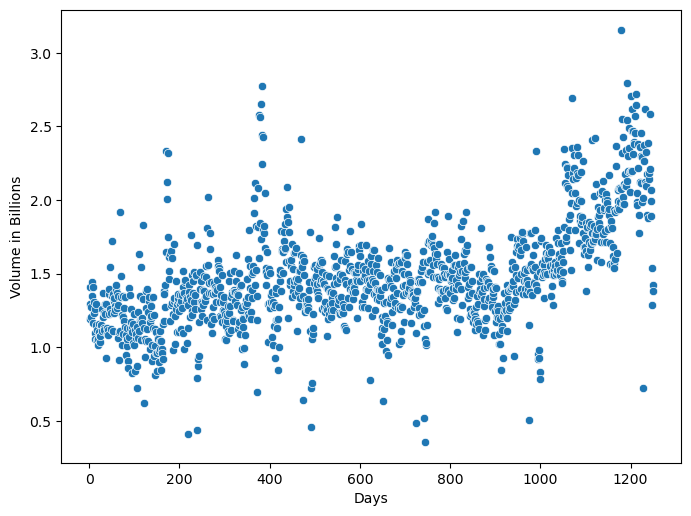

In [39]:
# Plot
_,ax = plt.subplots(figsize=(8,6), dpi=(100))

ax = sns.scatterplot(x = 'Day', y = 'Volume',data =market)
ax.set(xlabel = 'Days', ylabel = 'Volume in Billions')
plt.show()


## Logistic regression

Note : label the attributes "up" and "down" as 1/0, transfer the problem in to the logistic regression model

In [9]:
# Encode the response as 0,1 for the down/up
market['DirCoded'] = [0 if x == 'Down' else 1 for x in market.Direction]
market.head()


,Day,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction,DirCoded
0,1,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up,1
1,2,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up,1
2,3,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down,0
3,4,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up,1
4,5,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up,1


### statsmodels solution

In [10]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [11]:
# Build the model
f = "DirCoded ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume"
logit_fit = smf.logit(f, market).fit()
logit_fit.summary()

Optimization terminated successfully.
         Current function value: 0.691034
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               DirCoded   No. Observations:                 1250
Model:                          Logit   Df Residuals:                     1243
Method:                           MLE   Df Model:                            6
Date:                Thu, 18 Nov 2021   Pseudo R-squ.:                0.002074
Time:                        17:24:22   Log-Likelihood:                -863.79
converged:                       True   LL-Null:                       -865.59
Covariance Type:            nonrobust   LLR p-value:                    0.7319
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1260      0.241     -0.523      0.601      -0.598       0.346
Lag1          -0.0731      0.050     -1.457      0.145      -0.171       0.025
Lag2          -0.0423      0.050     -0.845      0.398      -0.140       0.056
Lag3           0.0111      0.050      0.222      0.824      -0.087       0.109
Lag4           0.0094      0.050      0.187      0.851      -0.089       0.107
Lag5           0.0103      0.050      0.208      0.835      -0.087       0.107
Volume         0.1354      0.158      0.855      0.392      -0.175       0.446
==============================================================================
"""

In [12]:
logit_fit.params

Intercept   -0.1260
Lag1        -0.0731
Lag2        -0.0423
Lag3         0.0111
Lag4         0.0094
Lag5         0.0103
Volume       0.1354
dtype: float64

In [13]:
logit_probs = logit_fit.predict(market)
logit_probs.head()

0    0.5071
1    0.4815
2    0.4811
3    0.5152
4    0.5108
dtype: float64

Criterion parameter :The following commands create a vector of class predictions based on whether the predicted probability of a market increase is greater than or less than 0.5.

In [14]:
# make logit_pred with the prob theshold = 0.5

market['logit_pred'] = ['Up' if p > 0.5 else 'Down' for p in logit_probs]

table = pd.crosstab(market.Direction, market.logit_pred)
table

logit_pred,Down,Up
Direction,,
Down,145,457
Up,141,507


In [15]:
# Compute Model Accuracy
logit_acc = (table.Down[0] + table.Up[1])/logit_fit.nobs

In [16]:
print(f"The model made {100 * logit_acc}% correct predictions on the trainning set")

The model made 52.16% correct predictions on the trainning set


In [17]:
np.mean(market.logit_pred == market.Direction)

0.5216

### Fit the Model using part of the data (2001-2004)

In [18]:
# Split the dataset train years:2001-2004, test year:2005
train_df = market[market.Year < 2005]
test_df = market[market.Year == 2005]
# test_df.shape  variables explorer 

In [19]:
# Fit the logistic model with the subset of observations before 2005

f = 'DirCoded ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume'
logit_fit = smf.logit(f, train_df).fit() # input the trainning data, fit the model
predicted_probs = logit_fit.predict(test_df) # make predictions by inputing the test data

Optimization terminated successfully.
         Current function value: 0.691936
         Iterations 4


In [20]:
test_df['preds'] = ['Up' if p > 0.5 else 'Down' for p in predicted_probs]

logit_acc = np.mean(test_df.preds == test_df.Direction) # magic
print(f"The model made {100 * logit_acc}% correct predictions on the Test Set")

The model made 48.01587301587302% correct predictions on the Test Set


/var/folders/dv/qnpc2tm905n3c2nrmq03c65w0000gn/T/ipykernel_65297/4053333098.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['preds'] = ['Up' if p > 0.5 else 'Down' for p in predicted_probs]


In [21]:
test_df.preds.value_counts()

Down    174
Up       78
Name: preds, dtype: int64

In [22]:
test_df.Direction.value_counts()

Up      141
Down    111
Name: Direction, dtype: int64

In [23]:
(test_df.preds == test_df.Direction) .value_counts()

False    131
True     121
dtype: int64

In [24]:
121 / 252

0.4802

In [25]:
(test_df.preds == test_df.Direction).mean()

0.4801587301587302

In [26]:
cm_table = pd.crosstab(test_df.Direction, test_df.preds)
cm_table

preds,Down,Up
Direction,,
Down,77,34
Up,97,44


In [27]:
table = logit_fit.pred_table(threshold = 0.5)

cm_df = pd.DataFrame(table,['Down', 'Up'],['Down', 'Up'])
cm_df

,Down,Up
Down,175.0,316.0
Up,156.0,351.0


In [28]:
logit_error = np.mean(test_df.preds != test_df.Direction)

print(f"The model made {100 * logit_error} % incorrect predictions on the Test Set.")

The model made 51.98412698412699 % incorrect predictions on the Test Set.


In [29]:
# LR  with just lag1 and lag2, here is why we need PCA
train_fit_12 = smf.logit('DirCoded ~ Lag1 + Lag2', train_df).fit()
predicted_probs_12 = train_fit_12.predict(test_df)
test_df['preds'] = ['Up' if p > 0.5 else 'Down' for p in predicted_probs_12]
logit_acc_12 = 100 * np.mean(test_df.preds == test_df.Direction)
print(f"The model made {logit_acc_12}% correct predictions on the Test Set")
cm_table_12 = pd.crosstab(test_df.preds, test_df.Direction)
cm_table_12


Optimization terminated successfully.
         Current function value: 0.692085
         Iterations 3
The model made 55.952380952380956% correct predictions on the Test Set


/var/folders/dv/qnpc2tm905n3c2nrmq03c65w0000gn/T/ipykernel_65297/3985825678.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['preds'] = ['Up' if p > 0.5 else 'Down' for p in predicted_probs_12]


Direction,Down,Up
preds,,
Down,35,35
Up,76,106


In [30]:
prob_up = round(cm_table_12['Up']['Up'] / (cm_table_12['Down']['Up'] + cm_table_12['Up']['Up']), 4)

print(f"On the days where ther prediction day is \'Up\' the probability the market will be \'Up\' is {prob_up}")

On the days where ther prediction day is 'Up' the probability the market will be 'Up' is 0.5824


Suppose that we want to predict the returns associated with particular values of `Lag1` and `Lag2`. In particular, we want to predict `Direction` on a day when `Lag1` and `Lag2` equal 1.2 and 1.1, respectively, and on a day when they equal 1.5 and -0.8. We do this using the predict() function.

In [31]:
lag_12 = pd.DataFrame({'Lag1': [1.2,1.5], 'Lag2':[1.1, -0.8]})
train_fit_12.predict(lag_12)

0    0.4791
1    0.4961
dtype: float64

### sklearn solution

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
market.head()

,Day,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction,DirCoded,logit_pred
0,1,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up,1,Up
1,2,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up,1,Down
2,3,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down,0,Down
3,4,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up,1,Up
4,5,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up,1,Up


In [40]:
# Fit the logistic model with the subset of observations before 2005
f = 'DirCoded ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume'
logit_fit = smf.logit(f, train_df).fit() # input the trainning data, fit the model
logit_fit.params

Optimization terminated successfully.
         Current function value: 0.691936
         Iterations 4


Intercept    0.1912
Lag1        -0.0542
Lag2        -0.0458
Lag3         0.0072
Lag4         0.0064
Lag5        -0.0042
Volume      -0.1163
dtype: float64

In [41]:
def loading(train_df, test_df, predictions, goal= ' DirCoded'):
    X_train = train_df[predictors]
    y_train = train_df[goal]
    X_test = test_df[predictors]
    y_test = test_df[goal]
    return X_train, y_train, X_test, y_test

In [56]:
def classify(clf,
             coef=True,
             auc=False,
             roc_curve=False,
             conf_mat=False,
             conf_labels=['Down', 'Up']):
    X_train, y_train, X_test, y_test = data[0], data[1], data[2], data[3]
    model = clf.fit(model, X_train, y_train)
    if coef:
        print("Parameters: {}".format(clf.coef))
        acc = clf.score(X_test, y_test)
        print("Accuracy: {}".format(acc))

        y_pred = clf.score(X_test)
        precision = precision_score(y_test, y_pred)
        print("Precision: {}".format(precision))

        recall = recall_score(y_test, y_pred)
        print("Recall: {}".format(recall))

        mat = confusion_matrix(y_test, y_pred)
        print('confusion matrix: \n {}'.format(mat))

    if auc:
        y_score = model.decision_function(X_test)
        auc = roc_auc_score(y_test, y_score)
        print(f'auc:{auc}')

    if roc_curve:
        plot_roc_curve(clf, X_test, y_test)

    if conf_mat:
        plot_confusion_matrix(clf,
                              X_test,
                              y_test,
                              cmap=plt.cm.blues,
                              display_labels=conf_labels)
    return clf

In [57]:
predictors = ['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5','Volume']

data = loading(train_df, test_df, predictors, goal= 'DirCoded')
log_clf = LogisticRegression(solver = 'lbfgs', tol = 0.0001)

In [58]:
logreg = classify(log_clf, data)

UnboundLocalError: local variable 'model' referenced before assignment

In [50]:
#  predictors = lag1 + lag2 + volume
data = loading(train_df, test_df, predictors, goal = 'DirCoded')
logreg = classify(log_clf, data)

UnboundLocalError: local variable 'model' referenced before assignment